In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.datasets import make_moons

In [2]:
# Dataset real
X, y_true = make_moons(n_samples=300, noise=0.08, random_state=42)

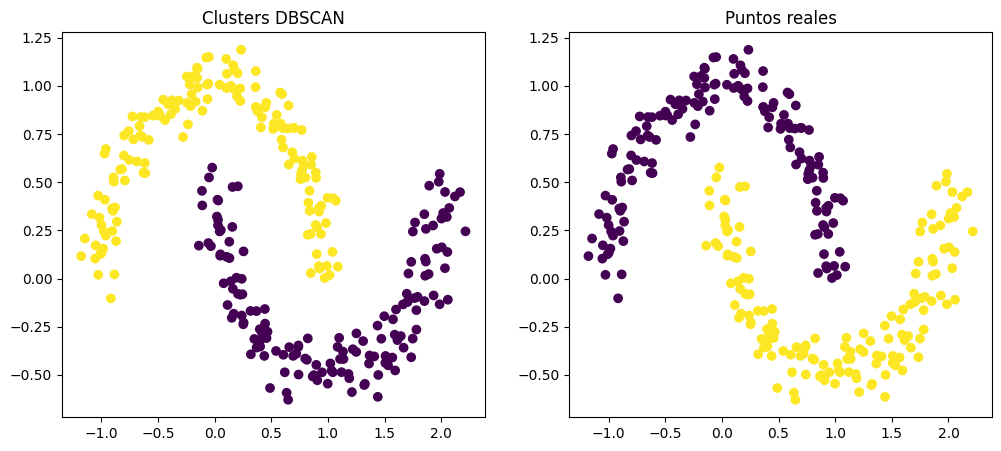

Número de clusters encontrados: 2
Número de puntos clasificados como ruido (-1): 0


In [3]:
# Entrenamiento DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

# Gráficas
plt.figure(figsize=(12,5))

# Puntos reales
plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], c=labels)
plt.title("Clusters DBSCAN")

# Puntos predichos
plt.subplot(1,2,2)
plt.scatter(X[:,0], X[:,1], c=y_true)
plt.title("Puntos reales")


plt.show()

# Contar el número de clusters:
# Obtenemos los valores únicos en 'labels' y excluimos el valor -1 (que representa el ruido/outliers en DBSCAN).
unique_clusters = np.unique(labels[labels != -1])
num_clusters = len(unique_clusters)

# Contar el número total de puntos de ruido
num_ruido = np.sum(labels == -1)

print(f"Número de clusters encontrados: {num_clusters}")
print(f"Número de puntos clasificados como ruido (-1): {num_ruido}")

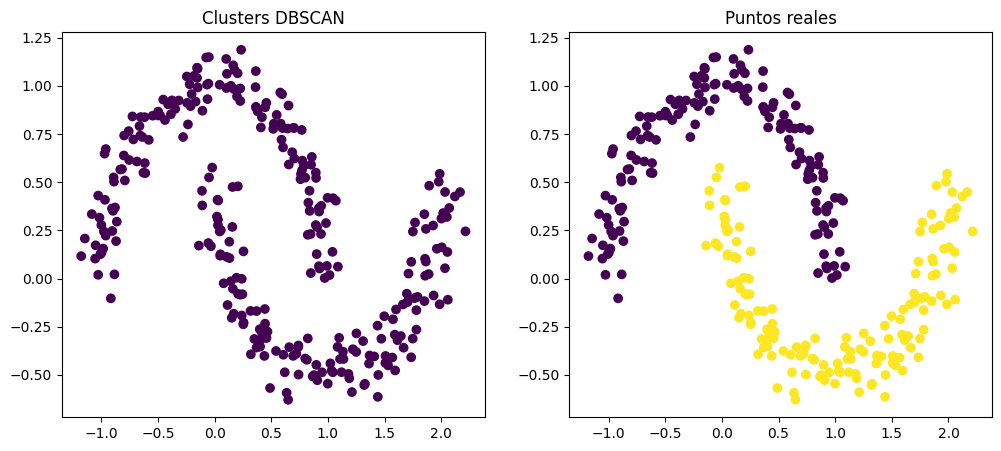

Número de clusters encontrados: 1
Número de puntos clasificados como ruido (-1): 0


In [4]:
# Entrenamiento DBSCAN Underfitting
dbscan = DBSCAN(eps=0.4, min_samples=5)
labels = dbscan.fit_predict(X)

# Gráficas
plt.figure(figsize=(12,5))

# Puntos reales
plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], c=labels)
plt.title("Clusters DBSCAN")

# Puntos predichos
plt.subplot(1,2,2)
plt.scatter(X[:,0], X[:,1], c=y_true)
plt.title("Puntos reales")


plt.show()

# Contar el número de clusters:
# Obtenemos los valores únicos en 'labels' y excluimos el valor -1 (que representa el ruido/outliers en DBSCAN).
unique_clusters = np.unique(labels[labels != -1])
num_clusters = len(unique_clusters)

# Contar el número total de puntos de ruido
num_ruido = np.sum(labels == -1)

print(f"Número de clusters encontrados: {num_clusters}")
print(f"Número de puntos clasificados como ruido (-1): {num_ruido}")

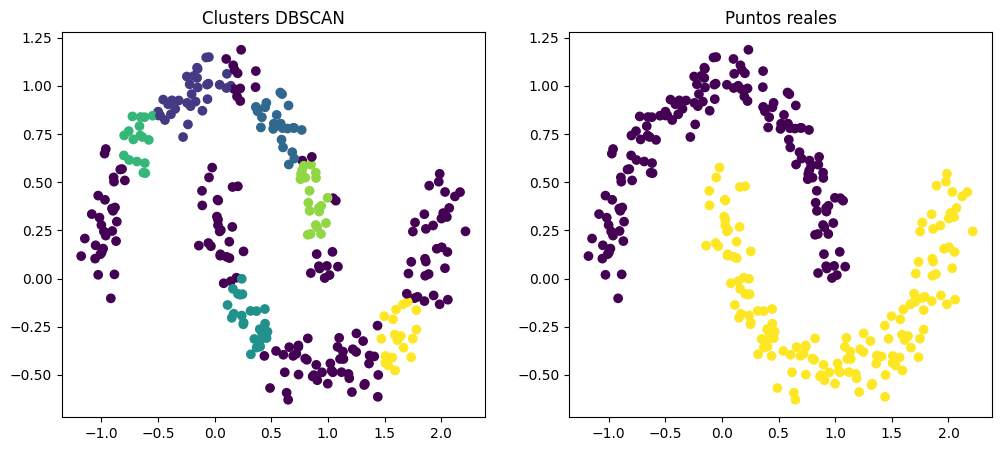

Número de clusters encontrados: 6
Número de puntos clasificados como ruido (-1): 159


In [5]:
# Entrenamiento DBSCAN Overfitting
dbscan = DBSCAN(eps=0.2, min_samples=20)
labels = dbscan.fit_predict(X)

# Gráficas
plt.figure(figsize=(12,5))

# Puntos reales
plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], c=labels)
plt.title("Clusters DBSCAN")

# Puntos predichos
plt.subplot(1,2,2)
plt.scatter(X[:,0], X[:,1], c=y_true)
plt.title("Puntos reales")

plt.show()

# Contar el número de clusters:
# Obtenemos los valores únicos en 'labels' y excluimos el valor -1 (que representa el ruido/outliers en DBSCAN).
unique_clusters = np.unique(labels[labels != -1])
num_clusters = len(unique_clusters)

# Contar el número total de puntos de ruido
num_ruido = np.sum(labels == -1)

print(f"Número de clusters encontrados: {num_clusters}")
print(f"Número de puntos clasificados como ruido (-1): {num_ruido}")

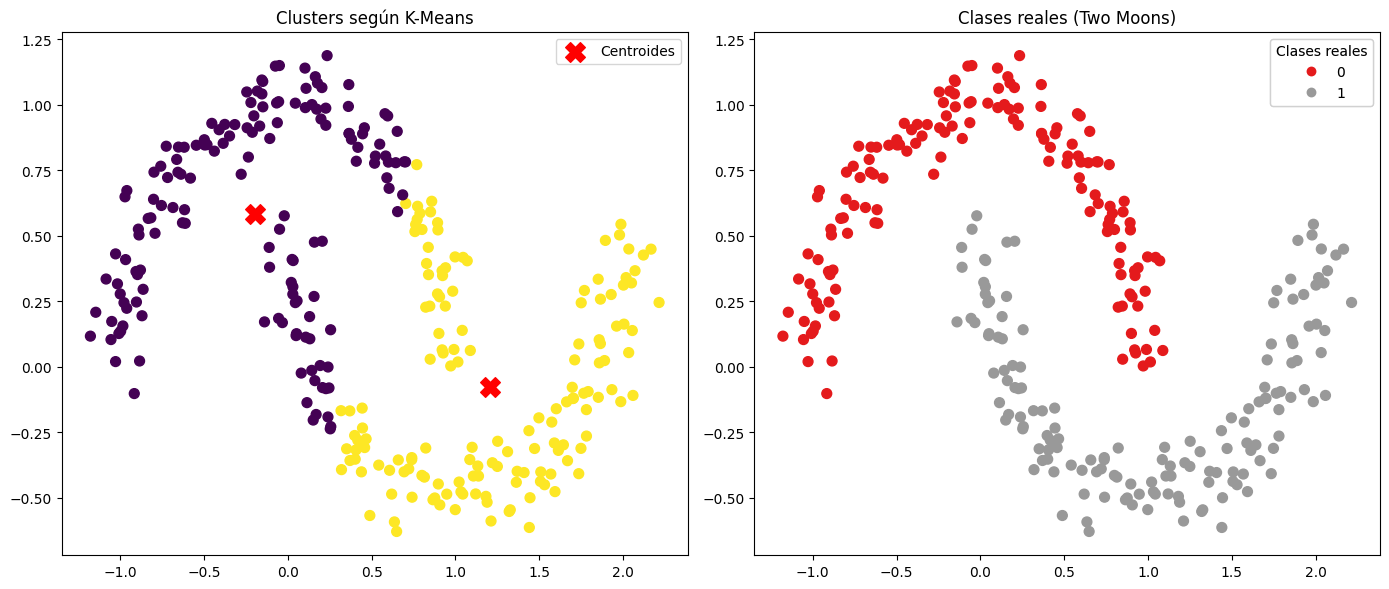

In [6]:
# K-Means con 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# 3. Visualización comparativa
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# Clusters de K-Means
scatter1 = axes[0].scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap="viridis", s=50)
centers = kmeans.cluster_centers_
axes[0].scatter(centers[:, 0], centers[:, 1], c="red", s=200, marker="X", label="Centroides")
axes[0].set_title("Clusters según K-Means")
axes[0].legend()

# Clases reales
scatter2 = axes[1].scatter(X[:, 0], X[:, 1], c=y_true, cmap="Set1", s=50)
legend2 = axes[1].legend(*scatter2.legend_elements(), title="Clases reales")
axes[1].add_artist(legend2)
axes[1].set_title("Clases reales (Two Moons)")

plt.tight_layout()
plt.show()